<a href="https://colab.research.google.com/github/edmanft/Drug_Synergy/blob/main/Visualizing_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to visualize embeddings with different techniques to see if there is some relevant information inside them.

Our embeddings dictionaries are extracted from our Tabular Learner model trained on the commutative dataset (we have duplicated combinations in the training set) and with added EarlyStopping Callback monitoring the Pearson Correlation metric (the global, not the weighted).

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.manifold import TSNE
import seaborn as sns


In [4]:

with open('/content/drive/MyDrive/archivos_tfm/Compound_B_embedding_dict.pkl', 'rb') as f:
    Compound_B_embedding_dict = pickle.load(f)

with open('/content/drive/MyDrive/archivos_tfm/Compound_A_embedding_dict.pkl', 'rb') as f:
    Compound_A_embedding_dict = pickle.load(f)

with open('/content/drive/MyDrive/archivos_tfm/cl_embedding_dict.pkl', 'rb') as f:
    cl_embedding_dict = pickle.load(f)




In [36]:
cl_names = list()
cl_vecs = list()
for cat, vec in cl_embedding_dict.items():
  cl_names.append(cat)
  cl_vecs.append(vec[0])
cl_vecs = np.array(cl_vecs)

In [39]:
cl_TSNE = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(cl_vecs)

Text(0.5, 1.0, 'Categorical embedding of Cell line name')

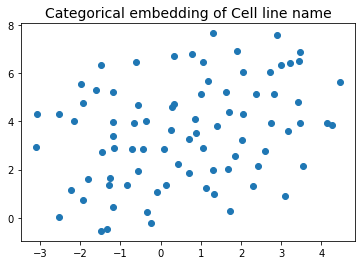

In [42]:
plt.scatter(cl_TSNE[:,0], cl_TSNE[:,1])
plt.title("Categorical embedding of Cell line name", fontsize = 14)


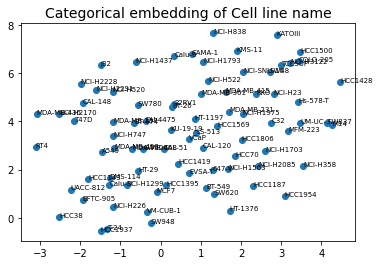

In [56]:
plt.scatter(cl_TSNE[:,0], cl_TSNE[:,1])

plt.title("Categorical embedding of Cell line name", fontsize = 14)
for i, txt in enumerate(cl_names):
    plt.annotate(txt, (cl_TSNE[i,0], cl_TSNE[i,1]), fontsize = 7)
plt.savefig("/content/drive/MyDrive/archivos_tfm/Cell_line_name_embedding_visualization.pdf")

We put everything inside a function called embedding_to_plot

In [48]:
def embedding_to_TSNE(embedding_dict):
  names = list()
  vecs = list()
  for cat, vec in embedding_dict.items():
    names.append(cat)
    vecs.append(vec[0])
  vecs = np.array(vecs)
  emb_TSNE = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(vecs)
  return names, emb_TSNE

Compound_A_names, Compound_A_TSNE = embedding_to_TSNE(Compound_A_embedding_dict)


Text(0.5, 1.0, 'Categorical embedding of Compound A')

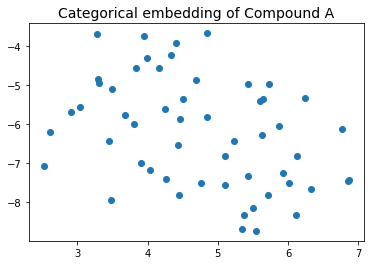

In [49]:
plt.scatter(Compound_A_TSNE[:,0], Compound_A_TSNE[:,1])
plt.title("Categorical embedding of Compound A", fontsize = 14)


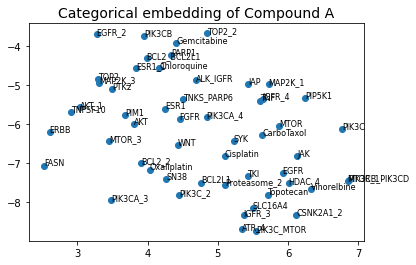

In [57]:
plt.scatter(Compound_A_TSNE[:,0], Compound_A_TSNE[:,1])
plt.title("Categorical embedding of Compound A", fontsize = 14)
for i, txt in enumerate(Compound_A_names):
    plt.annotate(txt, (Compound_A_TSNE[i,0], Compound_A_TSNE[i,1]), fontsize = 8)
plt.savefig("/content/drive/MyDrive/archivos_tfm/Compound_A_embedding_visualization.pdf")

Text(0.5, 1.0, 'Categorical embedding of Compound B')

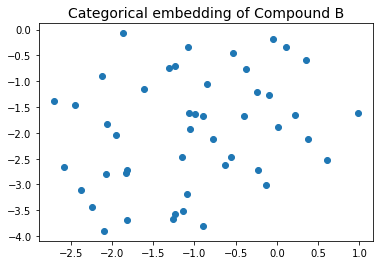

In [52]:
Compound_B_names, Compound_B_TSNE = embedding_to_TSNE(Compound_B_embedding_dict)

plt.scatter(Compound_B_TSNE[:,0], Compound_B_TSNE[:,1])
plt.title("Categorical embedding of Compound B", fontsize = 14)

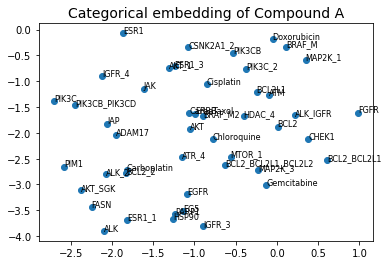

In [58]:
plt.scatter(Compound_B_TSNE[:,0], Compound_B_TSNE[:,1])
plt.title("Categorical embedding of Compound A", fontsize = 14)
for i, txt in enumerate(Compound_B_names):
    plt.annotate(txt, (Compound_B_TSNE[i,0], Compound_B_TSNE[i,1]), fontsize = 8)

plt.savefig("/content/drive/MyDrive/archivos_tfm/Compound_B_embedding_visualization.pdf")

#Looking for patterns in clustering

Now that we have our embedding plots, let's see if there is a relationship between neighbouring and pathway and/or target.

In [59]:
path = "/content/drive/MyDrive/archivos_tfm/saezr_nc19_DataS1_modificado.xlsx"
sheet_to_df_map = pd.read_excel(path, sheet_name=None)
df_cell_lines = sheet_to_df_map["Cell lines"]

df_drug_port = sheet_to_df_map["Drug portfolio"]


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


First we are going to see if the clustering in cell line names has anything to do with GDSC tissue descriptor 1.

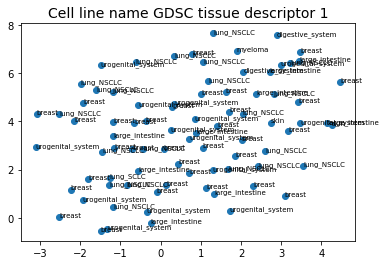

In [64]:
gdsc_dict = dict(zip(df_cell_lines["Cell line name"], df_cell_lines["GDSC tissue descriptor 1"]))
cl_gdsc = [gdsc_dict[x] for x in cl_names]
cl_gdsc
plt.scatter(cl_TSNE[:,0], cl_TSNE[:,1])

plt.title("Cell line name GDSC tissue descriptor 1", fontsize = 14)
for i, txt in enumerate(cl_gdsc):
    plt.annotate(txt, (cl_TSNE[i,0], cl_TSNE[i,1]), fontsize = 7)
# plt.savefig("/content/drive/MyDrive/archivos_tfm/Cell_line_name_embedding_visualization.pdf")

Let's put a different colour to each category or it is goind to be a pain to see anything

In [70]:
np.unique(cl_gdsc)

array(['breast', 'digestive_system', 'large_intestine', 'lung_NSCLC',
       'lung_SCLC', 'myeloma', 'skin', 'urogenital_system'], dtype='<U17')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


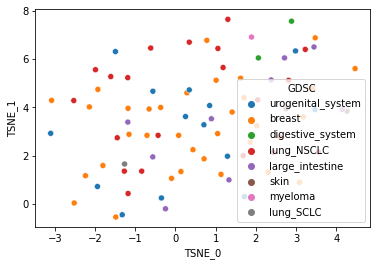

In [76]:
emb_df = pd.DataFrame() 
emb_df["TSNE_0"] = cl_TSNE[:,0]
emb_df["TSNE_1"] = cl_TSNE[:,1]
emb_df["GDSC"] = cl_gdsc


sns.scatterplot('TSNE_0', 'TSNE_1', data=emb_df, hue='GDSC')


We don't want the legend in the middle of the plot




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


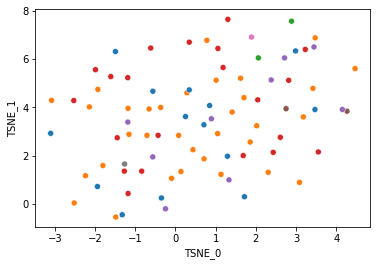

In [73]:
sns.scatterplot('TSNE_0', 'TSNE_1', data=emb_df, hue='GDSC', legend = False)

We are going to do the same for function in drug A and B.
First for Drug A:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


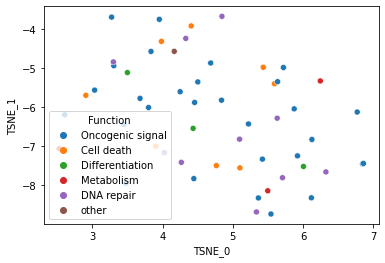

In [77]:
function_dict = dict(zip(df_drug_port["Challenge drug name"], df_drug_port["Function"]))
compound_A_func = [function_dict[x] for x in Compound_A_names]


emb_df = pd.DataFrame() 
emb_df["TSNE_0"] = Compound_A_TSNE[:,0]
emb_df["TSNE_1"] = Compound_A_TSNE[:,1]
emb_df["Function"] = compound_A_func
sns.scatterplot('TSNE_0', 'TSNE_1', data=emb_df, hue='Function')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


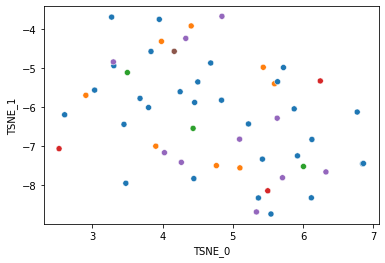

In [78]:
sns.scatterplot('TSNE_0', 'TSNE_1', data=emb_df, hue='Function', legend = False)


And for drug B

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


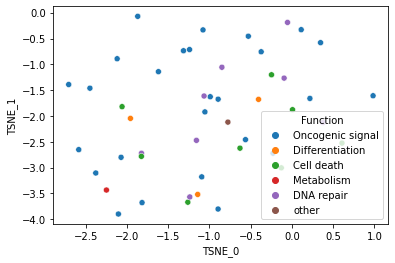

In [79]:
compound_B_func = [function_dict[x] for x in Compound_B_names]


emb_df = pd.DataFrame() 
emb_df["TSNE_0"] = Compound_B_TSNE[:,0]
emb_df["TSNE_1"] = Compound_B_TSNE[:,1]
emb_df["Function"] = compound_B_func
sns.scatterplot('TSNE_0', 'TSNE_1', data=emb_df, hue='Function')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


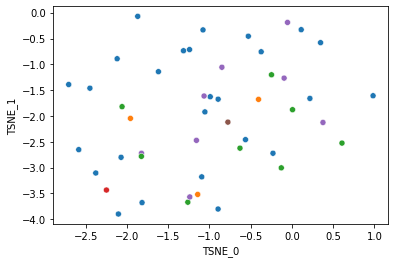

In [80]:
sns.scatterplot('TSNE_0', 'TSNE_1', data=emb_df, hue='Function', legend = False)


Lastly we try pathway, first for drug A

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


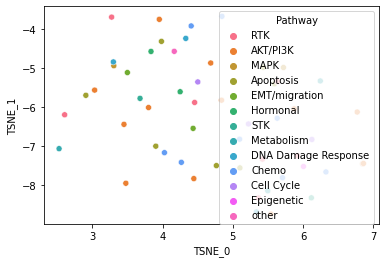

In [81]:
function_dict = dict(zip(df_drug_port["Challenge drug name"], df_drug_port["Pathway"]))
compound_A_path = [function_dict[x] for x in Compound_A_names]


emb_df = pd.DataFrame() 
emb_df["TSNE_0"] = Compound_A_TSNE[:,0]
emb_df["TSNE_1"] = Compound_A_TSNE[:,1]
emb_df["Pathway"] = compound_A_path
sns.scatterplot('TSNE_0', 'TSNE_1', data=emb_df, hue='Pathway')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


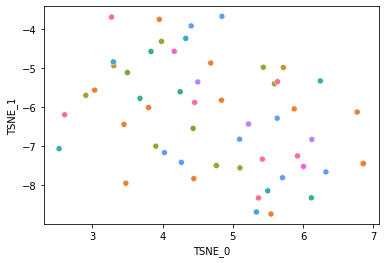

In [82]:
sns.scatterplot('TSNE_0', 'TSNE_1', data=emb_df, hue='Pathway', legend = False)


and now for drug B

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


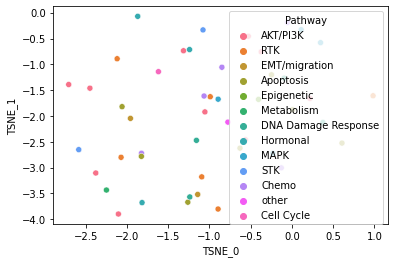

In [83]:
function_dict = dict(zip(df_drug_port["Challenge drug name"], df_drug_port["Pathway"]))
compound_B_path = [function_dict[x] for x in Compound_B_names]


emb_df = pd.DataFrame() 
emb_df["TSNE_0"] = Compound_B_TSNE[:,0]
emb_df["TSNE_1"] = Compound_B_TSNE[:,1]
emb_df["Pathway"] = compound_B_path
sns.scatterplot('TSNE_0', 'TSNE_1', data=emb_df, hue='Pathway')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


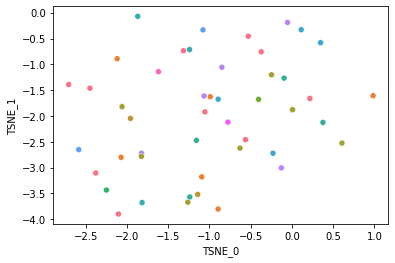

In [84]:
sns.scatterplot('TSNE_0', 'TSNE_1', data=emb_df, hue='Pathway', legend = False)